# Libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Functions

In [86]:
# Exponential function to fit
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

def plot_curve(x, y, title, xlabel, ylabel, in_percentage=False):
    if in_percentage:
        y = np.array(y) * 100  # Convert y values to percentage if in_percentage is True
        
    # Fit the curve
    popt, pcov = curve_fit(exponential_func, x, y, p0=(1, 0.1, 1))
    popt[2] = -popt[0]
    # Generate x values for the fitted curve
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = exponential_func(x_fit, *popt)
        
    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, 'bo', label='Original data')
    if (popt[2] > 0):
        plt.plot(x_fit, y_fit, 'r-', label='Exponential fit: $y = %.4f e^{%.4f x} + %.4f$' % tuple(popt))
    if (popt[2] < 0):
        plt.plot(x_fit, y_fit, 'r-', label='Exponential fit: $y = %.4f e^{%.4f x} %.4f$' % tuple(popt))
    else:
        plt.plot(x_fit, y_fit, 'r-', label='Exponential fit: $y = %.4f e^{%.4f x}' % tuple(popt))
    plt.xlabel(xlabel)
    if in_percentage:
        plt.ylabel(ylabel + ' (%)')
    else:
        plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_bar_charts(data_dict, title, xlabel, ylabel, as_percentage=False):
    if not data_dict:
        print("Error: Data dictionary is empty.")
        return
    
    # Get data, bar names, and bar colors from the dictionary
    data_values = [item[0] for item in data_dict.values()]
    bar_names = [item[1] for item in data_dict.values()]
    bar_colors = [item[2] for item in data_dict.values()]
    num_bars = len(data_values)
    
    # Convert data to percentages if as_percentage is True
    if as_percentage:
        data_values = [data * 100 for data in data_values]
        ylabel += ' (%)'
    
    # Generate x values for each bar chart
    x_values = range(1, num_bars + 1)
    
    # Plotting each bar chart with specified colors
    for i, data in enumerate(data_values):
        value_text = f'{data:.2f}'
        if as_percentage:
            value_text += '%'
        plt.bar(x_values[i], data, label='', color=bar_colors[i])
        plt.text(x_values[i], data + 0.05 * max(data_values), value_text, ha='center')
    
    # Adding labels below each bar
    for i, bar_name in enumerate(bar_names):
        plt.text(x_values[i], -0.05 * max(data_values), bar_name, ha='center')
    
    # Adding labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Adjusting y-axis limits based on maximum data value
    plt.ylim(0, max(data_values) + 0.2 * max(data_values))  # Adjusted y-axis limits
    
    # Adding dotted gridlines
    plt.grid(axis='y', linestyle='--')
    
    # Removing x-axis ticks and labels
    plt.xticks([])
    
    # Adding legend
    plt.legend()
    
    # Displaying the plot
    plt.show()

# Dataset

In [17]:
# Data
age = [
    10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
    30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
    50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
    70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82
]

stroke_victims = [
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 3, 1, 1, 2, 3, 3,
    3, 3, 2, 1, 6, 2, 2, 6, 3, 5, 4, 4, 0, 6, 1, 2, 3, 3, 7, 5,
    6, 5, 5, 4, 6, 2, 3, 7, 12, 13, 14, 12, 8
]

percentage_per_age = [
    0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
    0.0000, 0.0000, 0.0189, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0169, 0.0536, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0500, 0.0204, 0.0161, 0.0400, 0.0508,
    0.0455, 0.0435, 0.0290, 0.0156, 0.0779, 0.0299, 0.0323, 0.0789, 0.0600, 0.0833, 0.0741, 0.0678, 0.0000, 0.1000, 0.0238, 0.0408, 0.0600, 0.0789, 0.1892, 0.1163,
    0.1667, 0.1087, 0.1282, 0.1081, 0.2069, 0.0526, 0.0833, 0.2593, 0.1714, 0.2097, 0.2500, 0.2553, 0.1739
]

# Implementation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


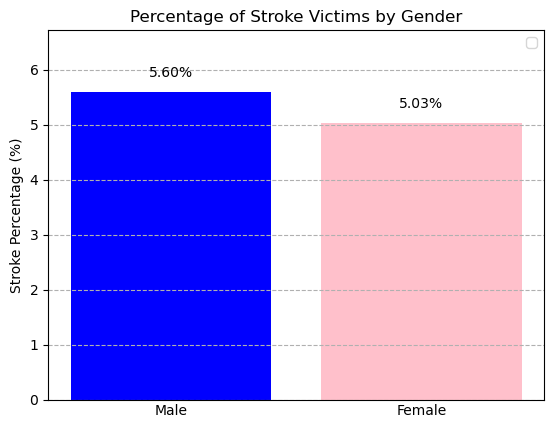

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


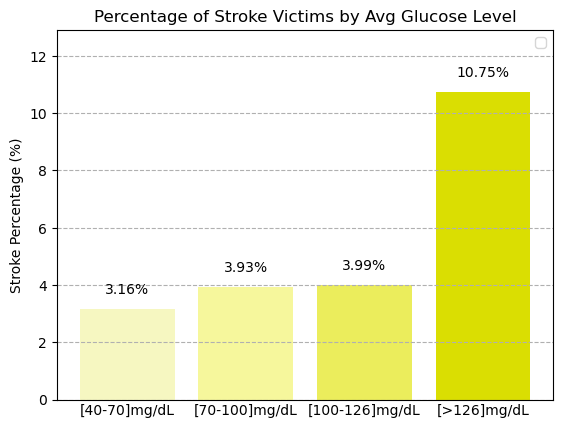

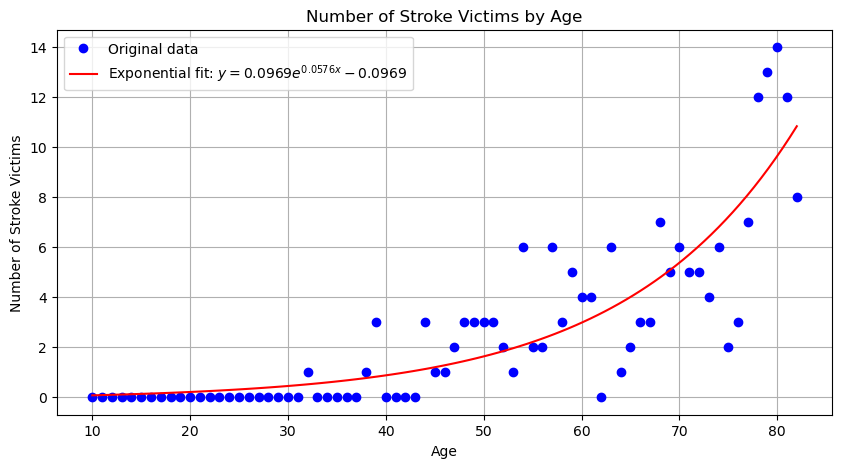

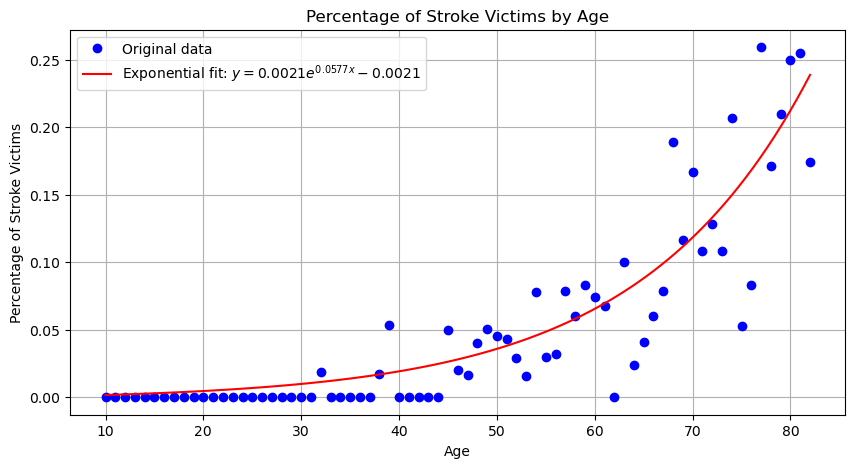

In [87]:
data_dict = {1: (0.056, 'Male', 'blue'), 2: (0.0503, 'Female', 'pink')}
plot_bar_charts(data_dict, 'Percentage of Stroke Victims by Gender', '', 'Stroke Percentage', True)

data_dict = {1: (0.0316, '[40-70]mg/dL', '#f6f7c1'), 2: (0.0393, '[70-100]mg/dL', '#f6f79c'), 3: (0.0399, '[100-126]mg/dL', '#ebed5c'), 4: (0.1075, '[>126]mg/dL', '#dade02')}
plot_bar_charts(data_dict, 'Percentage of Stroke Victims by Avg Glucose Level', '', 'Stroke Percentage', True)

plot_curve(age, stroke_victims, 'Number of Stroke Victims by Age','Age','Number of Stroke Victims')
plot_curve(age, percentage_per_age, 'Percentage of Stroke Victims by Age','Age','Percentage of Stroke Victims', False)